In [1]:
!pip install cupy-cuda100

     |████████████████████████████████| 58.9 MB 1.5 MB/s 


In [2]:
import cupy as cp
import numpy as np

import pickle
import timeit

import matplotlib.pyplot as plt

## [High performance with <u><i><strong>CUDA</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u> is an open-source matrix library accelerated with <u><i><strong>NVIDIA CUDA</strong></i></u>. <u><i><strong>CuPy</strong></i></u> provides GPU accelerated computing with Python. CuPy uses CUDA-related libraries including <u><i><strong>cuBLAS</strong></i></u>, <u><i><strong>cuDNN</strong></i></u>, <u><i><strong>cuRand</strong></i></u>, <u><i><strong>cuSolver</strong></i></u>, <u><i><strong>cuSPARSE</strong></i></u>, <u><i><strong>cuFFT</strong></i></u> and <u><i><strong>NCCL</strong></i></u> to make full use of the <u><i><strong>GPU</strong></i></u> architecture.
The figure shows <u><i><strong>CuPy</strong></i></u> speedup over NumPy. Most of them perform well on a <u><i><strong>GPU</strong></i></u> using CuPy out of the box. <u><i><strong>CuPy</strong></i></u> speeds up some operations more than 100X. You can read original benchmark article in [Single-<u><i><strong>GPU</strong></i></u> <u><i><strong>CuPy</strong></i></u> Speedups (RAPIDS AI)](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb).

![CuPy speedup over NumPy](cupy-performance.png)

## [Highly compatible with <u><i><strong>NumPy</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u>'s interface is highly compatible with <u><i><strong>NumPy</strong></i></u>; in most cases it can be used as a <strong><i><u>drop-in replacement</u></i></strong>. <i><u>All you need to do</u></i> is just <strong><i><u>replace numpy with cupy</u></i></strong> in your Python code. [Basics of <u><i><strong>CuPy</strong></i></u> (Tutorial)](https://docs-cupy.chainer.org/en/stable/tutorial/basic.html) is usefull to learn first step of <u><i><strong>CuPy</strong></i></u>.
<u><i><strong>CuPy</strong></i></u> supports various methods, indexing, data types, broadcasting and more. [Comparison Table (Reference Manual)](https://docs-cupy.chainer.org/en/stable/reference/comparison.html) shows a list of NumPy / <u><i><strong>SciPy</strong></i></u> APIs and its corresponding <u><i><strong>CuPy</strong></i></u> implementations.

In [3]:
x = cp.arange(6).reshape(2, 3).astype('f')
print("x =\n", x)

sum_result = x.sum(axis=1)
print("\nsum = ",sum_result)

x =
 [[0. 1. 2.]
 [3. 4. 5.]]

sum =  [ 3. 12.]


## [Easy to write a custom kernel](https://cupy.chainer.org/)
You can easily make a custom <u><i><strong>CUDA</strong></i></u> kernel if you want to make your code run faster, requiring only a small code snippet of <u><i><strong>C++</strong></i></u>. <u><i><strong>CuPy</strong></i></u> automatically wraps and compiles it to make a <u><i><strong>CUDA</strong></i></u> binary. Compiled binaries are cached and reused in subsequent runs. Please read [User-Defined Kernels (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html).
And, you can also use raw <u><i><strong>CUDA</strong></i></u> kernel via [Raw modules (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html#raw-modules).


In [4]:
x = cp.arange(6, dtype='f').reshape(2, 3)
y = cp.arange(3, dtype='f')

kernel=cp.ElementwiseKernel(
    'float32 x,float32 y','float32 z',
        '''if(x-2>y){
        z=x*y;
        }else{
        z=x+y;
        }''',
    'my_kernel')

print("Input x = \n", x)
print("\nInput y = \n", y)

result = kernel(x, y)

print("\nresult of the kernel =\n", result)

Input x = 
 [[0. 1. 2.]
 [3. 4. 5.]]

Input y = 
 [0. 1. 2.]

result of the kernel =
 [[ 0.  2.  4.]
 [ 0.  4. 10.]]


# Task 10. Saxpy

By using <u><i><strong>CuPy</strong></i></u>, implement SAXPY function. The function is described in the picture.

![saxpy](saxpy.jpg)

In [5]:
n = 100
x = cp.random.randn(n)
y = cp.random.randn(n)
alpha = cp.random.rand()

In [6]:
def saxpy(x, y, alpha):
    return alpha * x + y

In [7]:
%%timeit
saxpy(x, y, alpha)

The slowest run took 22990.91 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 23.4 µs per loop


## Compare Performance of `cupy` vs `numpy`

In [8]:
np_time_history = []
cp_time_history = []

nn = np.logspace(1, 7, num=7, base=10).astype(int)

for n in nn:
    np_x, np_y, np_alpha = x = np.random.randn(n), np.random.randn(n), np.random.rand()
    cp_x, cp_y, cp_alpha = x = cp.random.randn(n), cp.random.randn(n), cp.random.rand()

    np_time = timeit.timeit(lambda: np_alpha * np_x + np_y, number=1000)
    cp_time = timeit.timeit(lambda: cp_alpha * cp_x + cp_y, number=1000)

    print(f'size: {n}\ntime for numpy: {np_time:.4f}, time for cupy: {cp_time:.4f}\n')
    np_time_history.append(np_time / 100)
    cp_time_history.append(cp_time / 100)

size: 10
time for numpy: 0.0033, time for cupy: 0.0286

size: 100
time for numpy: 0.0015, time for cupy: 0.0237

size: 1000
time for numpy: 0.0025, time for cupy: 0.0221

size: 10000
time for numpy: 0.0155, time for cupy: 0.0227

size: 100000
time for numpy: 0.2214, time for cupy: 0.0228

size: 1000000
time for numpy: 2.0354, time for cupy: 0.1506

size: 10000000
time for numpy: 38.5906, time for cupy: 1.2341



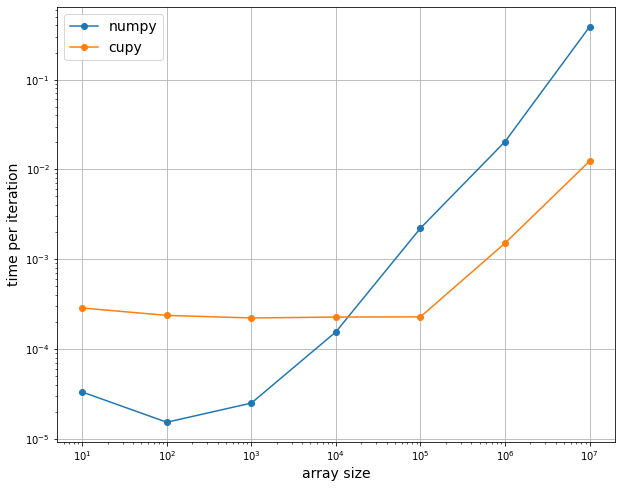

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(nn, np_time_history, '-o', label='numpy')
plt.plot(nn, cp_time_history, '-o', label='cupy')

plt.xlabel('array size', fontsize=14)
plt.ylabel('time per iteration', fontsize=14)

plt.yscale('log', basey=10)
plt.xscale('log', basex=10)

plt.legend(fontsize=14)
plt.grid()
plt.show()

Starting from size $1e5$ `cupy` becomes more than $10$ times faster. However, for smaller sizes of array, `numpy` is faster. The possible reason 
is that communication between CPU and GPU takes additional time and becomes a bottleneck, which can be seen in a constant time for `cupy` on small sizes.

# Task 11. CuPy-based Bifurcation map

By using <u><i><strong>CuPy</strong></i></u>, reimplement bifurcation map (Task 1).

In [10]:
def logistic_map(x, r):
    return r * x * (1 - x)

def calculate_system_evolution(x, rr, n_iterations, mode):
    evolution = np.empty((n_iterations + 1, len(rr))) if mode == 'numpy' else \
                cp.empty((n_iterations + 1, len(rr)))
    evolution[0] = x

    for i in range(n_iterations):
        evolution[i + 1] = logistic_map(evolution[i], rr)
    
    return evolution

def construct_bifurcation_map(x, rr, n_iterations, n_last_iterations, mode='numpy'):
    param_ax = np.repeat(rr.reshape(1, -1), n_last_iterations, axis=0) if mode == 'numpy' else \
               cp.repeat(rr.reshape(1, -1), n_last_iterations, axis=0)
    state_ax = calculate_system_evolution(x, rr, n_iterations, mode)[-n_last_iterations:]   
    
    return param_ax, state_ax

In [11]:
n_params = int(1e4)
n_iterations = int(1e4)
n_last_iterations = int(1e2)

x = cp.random.rand()
rr = cp.linspace(1, 4, n_params)

In [12]:
%%time
param_ax, state_ax = construct_bifurcation_map(x, rr, n_iterations, n_last_iterations, mode='cupy')

CPU times: user 1.83 s, sys: 21.1 ms, total: 1.85 s
Wall time: 1.85 s


In [13]:
param_ax, state_ax = cp.asnumpy(param_ax).reshape(-1), cp.asnumpy(state_ax).reshape(-1)

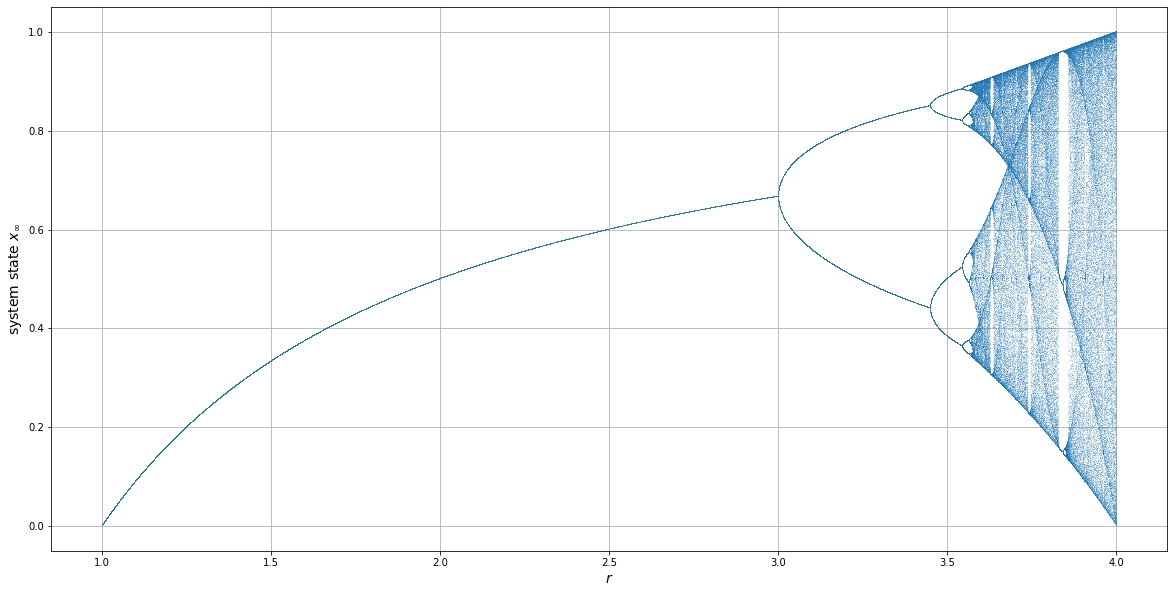

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(param_ax, state_ax, ',', alpha=0.2)

plt.xlabel('$r$', fontsize=14)
plt.ylabel('system state $x_{\infty}$', fontsize=14)

plt.grid()
plt.show()

## Profile `cupy` and `numpy` Implementation

In [15]:
n_params = int(1e4)
n_iterations = int(1e4)
n_last_iterations = int(1e2)

x = cp.random.rand()
rr = cp.linspace(1, 4, n_params)

In [16]:
s = %prun -r construct_bifurcation_map(x, rr, n_iterations, n_last_iterations, mode='cupy')
s.print_stats()

          80018 function calls in 0.881 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.577    0.000    0.626    0.000 <ipython-input-10-951c24c53053>:1(logistic_map)
        1    0.231    0.231    0.881    0.881 <ipython-input-10-951c24c53053>:4(calculate_system_evolution)
    10002    0.031    0.000    0.031    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    20001    0.019    0.000    0.024    0.000 numeric.py:1816(isscalar)
    10000    0.015    0.000    0.048    0.000 <__array_function__ internals>:2(min_scalar_type)
    20001    0.005    0.000    0.005    0.000 {built-in method builtins.isinstance}
    10000    0.003    0.000    0.003    0.000 multiarray.py:583(min_scalar_type)
        1    0.000    0.000    0.000    0.000 {method 'repeat' of 'cupy._core.core.ndarray' objects}
        1    0.000    0.000    0.881    0.881 {built-in method builtins.exec}
        1    0.00

In [17]:
x = np.random.rand()
rr = np.linspace(1, 4, n_params)

In [18]:
s = %prun -r construct_bifurcation_map(x, rr, n_iterations, n_last_iterations, mode='numpy')
s.print_stats()

          10015 function calls in 0.571 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.312    0.000    0.312    0.000 <ipython-input-10-951c24c53053>:1(logistic_map)
        1    0.254    0.254    0.567    0.567 <ipython-input-10-951c24c53053>:4(calculate_system_evolution)
        1    0.002    0.002    0.002    0.002 {method 'repeat' of 'numpy.ndarray' objects}
        1    0.002    0.002    0.571    0.571 <string>:1(<module>)
        1    0.001    0.001    0.001    0.001 {built-in method numpy.empty}
        1    0.000    0.000    0.571    0.571 {built-in method builtins.exec}
        1    0.000    0.000    0.569    0.569 <ipython-input-10-951c24c53053>:13(construct_bifurcation_map)
        1    0.000    0.000    0.002    0.002 fromnumeric.py:52(_wrapfunc)
        1    0.000    0.000    0.002    0.002 <__array_function__ internals>:2(repeat)
        1    0.000    0.000    0.000    0.000 {method 'reshape' o

## Compare Performance of `numpy` vs `cupy` vs `mpi4py`

In [19]:
!pip install mpi4py

     |████████████████████████████████| 2.5 MB 11.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185312 sha256=f9d3a34621ed6af89f2113f59efae36e646ba2b523595cc64a88957f3e9d8a7e
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


In [20]:
%%writefile solution-lab-5.py

import numpy as np
import pickle
import sys

from mpi4py import MPI

### define functions for modeling

def logistic_map(x, r):
    return r * x * (1 - x)

def calculate_system_evolution(x, rr_range, n_iterations, n_last_iterations):
    rr_size = len(rr_range)
    
    evolution = np.hstack([
        x * np.ones(shape=(rr_size, 1), dtype=np.float64),
        np.zeros(shape=(rr_size, n_iterations), dtype=np.float64)
    ])

    for i in range(1, n_iterations + 1):
        xx = evolution[:, i - 1]
        evolution[:, i] = logistic_map(xx, rr_range)

    evolution = evolution[:, -n_last_iterations:]
    return evolution.reshape(-1)

### setup mpi environment

comm = MPI.COMM_WORLD
start = MPI.Wtime()

rank = comm.Get_rank()
size = comm.Get_size()
root = 0

### define parameters for modeling

n_params = int(1e3) if len(sys.argv) == 1 else int(sys.argv[1])
n_iterations = int(5e2)
n_last_iterations = int(1e2)

x = 0.5
rr = np.linspace(1, 4, n_params)

### assign modeling parts between processes

rr_count = int(len(rr) / size)
rr_range = rr[rank * rr_count:(rank + 1) * rr_count]
evolution_complete = np.empty(len(rr) * n_last_iterations) if rank == root else None

### perform modeling in every process

evolution_range = calculate_system_evolution(x, rr_range, n_iterations, n_last_iterations)

### gather modeling results in root process

comm.Gather(evolution_range, evolution_complete, root)
end = MPI.Wtime()

if rank == root:
    with open(f'params-{n_params}.pkl', 'wb') as f:
        pickle.dump(rr, f)

    with open(f'evolution-{n_params}.pkl', 'wb') as f:
        pickle.dump(evolution_complete, f)
    
    with open(f'time-{n_params}.pkl', 'wb') as f:
        pickle.dump(end - start, f)

Writing solution-lab-5.py


In [21]:
nn = np.logspace(2, 6, base=10, num=5).astype(np.int)
n_processes = 4

for n_params in nn:
    !mpirun --allow-run-as-root -n {n_processes} python3 solution-lab-5.py {n_params}

In [22]:
mpi_time_history = []

for n_params in nn:
    with open(f'time-{n_params}.pkl', 'rb') as f:
        time_elapsed = pickle.load(f)
    mpi_time_history.append(time_elapsed)

In [23]:
x = 0.5
n_iterations = int(1e3)
n_last_iterations = int(1e2)

nn = np.logspace(2, 6, base=10, num=5).astype(np.int)
cp_time_history, np_time_history = [], []

for n_params in nn:
    cp_rr = cp.linspace(1, 4, n_params)
    np_rr = cp.asnumpy(cp_rr)
    
    cp_time = timeit.timeit(lambda: construct_bifurcation_map(x, cp_rr, n_iterations, n_last_iterations, mode='cupy'), number=5) / 5
    np_time = timeit.timeit(lambda: construct_bifurcation_map(x, np_rr, n_iterations, n_last_iterations, mode='numpy'), number=5) / 5
    
    cp_time_history.append(cp_time)
    np_time_history.append(np_time)

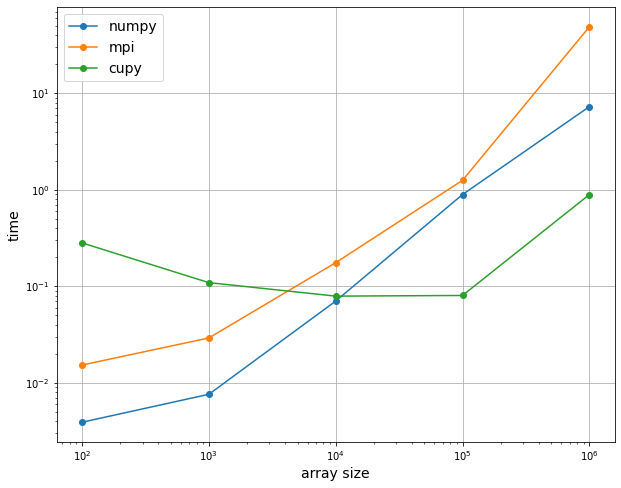

In [24]:
plt.figure(figsize=(10, 8))

plt.plot(nn, np_time_history, '-o', label='numpy')
plt.plot(nn, mpi_time_history, '-o', label='mpi')
plt.plot(nn, cp_time_history, '-o', label='cupy')

plt.xlabel('array size', fontsize=14)
plt.ylabel('time', fontsize=14)

plt.yscale('log', basey=10)
plt.xscale('log', basex=10)

plt.legend(fontsize=14)
plt.grid()
plt.show()

It can be seen, that `numpy` is the most effective for small arrays since it doesn't have any communication costs in contrast to `mpi` and `cupy`. 
But the greater is the size of array, the better is the performance of `mpi` and especially `cupy`. The reason is that `cupy` exploits CUDA 
which provides significant speedup, while `mpi` takes advantage from paralleling

# Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

<strong >Hint about function $f(x)$ appearance:</strong>
![Hint](hint.png)

## Implement Function $f(x)$

In [25]:
def z(x):
    return cp.sin(3 * x) - 0.5

def f(x):
    return (z(x) ** 2 + z(x) ** 3 - 200 * z(x) ** 4) * cp.sin(100000 * (x + 0.5))

In [26]:
cp_xx = cp.linspace(0, 1, int(1e7))
cp_ff = f(cp_xx)

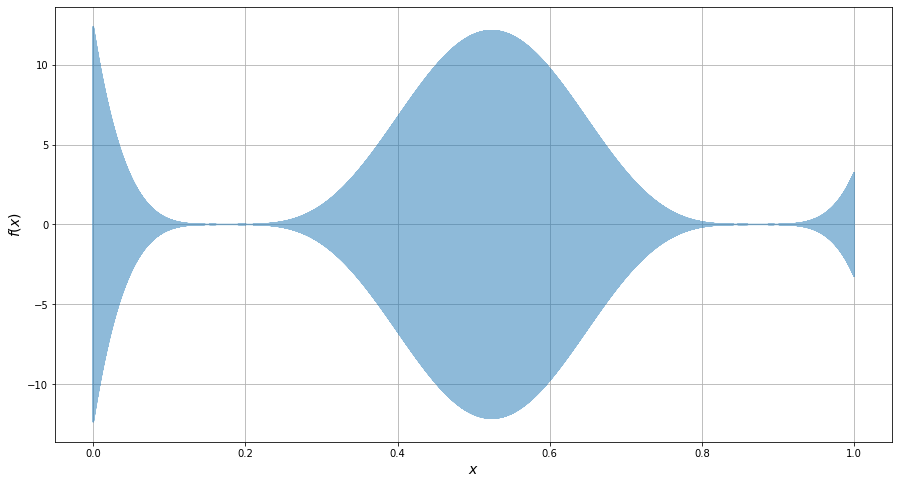

In [27]:
np_xx = cp.asnumpy(cp_xx)
np_ff = cp.asnumpy(cp_ff)

plt.figure(figsize=(15, 8))
plt.plot(np_xx, np_ff, alpha=0.5)

plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)

plt.grid()
plt.show()

## Plot Histogram

In [28]:
f_min, f_max = cp_ff.min(), cp_ff.max()

In [29]:
ticks = cp.linspace(f_min, f_max + 1e-5, 11)

In [40]:
greater = cp.greater_equal(cp_ff.reshape(-1, 1), ticks[:-1].T)
less = cp.less(cp_ff.reshape(-1, 1), ticks[1:].T)

cp_result = cp.logical_and(greater, less)
cp_bars = cp.sum(cp_result, axis=0)
cp_coordinates = (ticks[:-1] + ticks[1:]) / 2

In [41]:
np_coordinates = cp.asnumpy(cp_coordinates)
np_bars = cp.asnumpy(cp_bars)

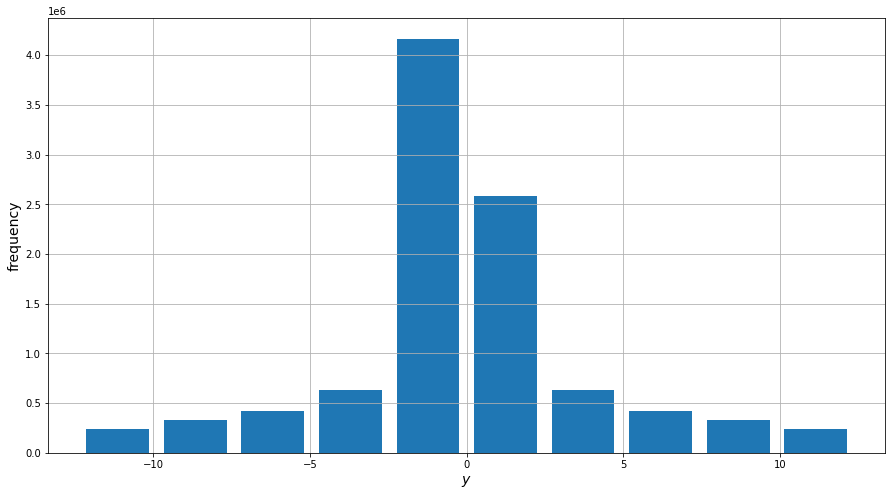

In [42]:
plt.figure(figsize=(15, 8))
plt.bar(np_coordinates, np_bars, width=2.)

plt.xlabel('$y$', fontsize=14)
plt.ylabel('frequency', fontsize=14)

plt.grid()
plt.show()

## Compare Performance `cupy` vs `numpy`

In [43]:
%%timeit -n 10
_ = cp.sum(cp_result, axis=0)

The slowest run took 4.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 42.1 µs per loop


In [44]:
np_result = cp.asnumpy(cp_result)

In [45]:
%%timeit -n 10
_ = np.sum(np_result, axis=0)

10 loops, best of 5: 327 ms per loop


It can be seen that `cupy` is **much** faster

# Task 13. Image blur


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image and 

<strong >Example of a blurred image:</strong>
    ![Blur](blur.jpg)

In [46]:
import cv2

In [47]:
!wget https://pbs.twimg.com/media/E-vdiMvWEAELhHO.jpg

--2021-12-22 22:40:57--  https://pbs.twimg.com/media/E-vdiMvWEAELhHO.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.233.50, 2606:2800:134:fa2:1627:1fe:edb:1665
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.233.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103865 (101K) [image/jpeg]
Saving to: ‘E-vdiMvWEAELhHO.jpg’

E-vdiMvWEAELhHO.jpg 100%[===================>] 101.43K  --.-KB/s    in 0.01s   

2021-12-22 22:40:57 (9.41 MB/s) - ‘E-vdiMvWEAELhHO.jpg’ saved [103865/103865]



In [48]:
np_image = cv2.imread('E-vdiMvWEAELhHO.jpg')
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2GRAY)

In [49]:
cp_image = cp.array(np_image)

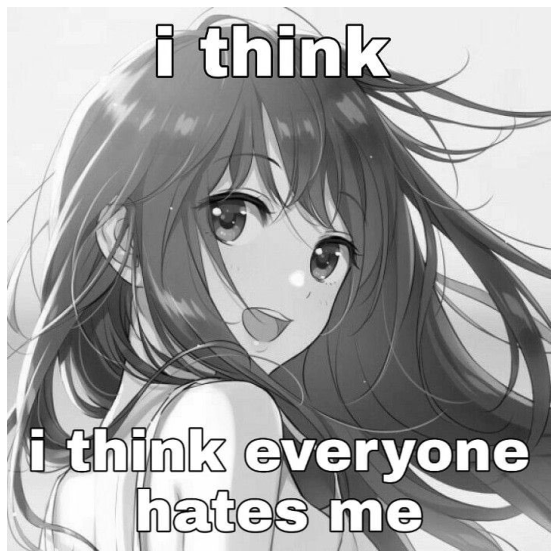

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(np_image, cmap='gray')

plt.axis('off')
plt.show()

### Preprocess Images for Fast Convolution via Dot Product

In [92]:
def preprocess_image_and_kernel(image, kernel, mode='numpy'):
    image_size = image.shape[0]
    half_size = kernel.shape[0] // 2
    ravel_size = kernel.ravel().shape[0]

    kernel_preprocessed = kernel.ravel()
    image_preprocessed = np.empty((image_size - 2 * half_size, image_size - 2 * half_size, ravel_size)) if mode == 'numpy' else \
                         cp.empty((image_size - 2 * half_size, image_size - 2 * half_size, ravel_size))

    for i in range(half_size, image_size - half_size):
        for j in range(half_size, image_size - half_size):
            image_preprocessed[i - half_size, j - half_size] = \
            image[i - half_size:i + half_size + 1, j - half_size:j + half_size + 1].ravel()

    return image_preprocessed, kernel_preprocessed

In [93]:
cp_kernel = cp.ones((5, 5)) / 25
np_kernel = cp.asnumpy(cp_kernel)

In [94]:
%%time
cp_image_preprocessed, cp_kernel_preprocessed = preprocess_image_and_kernel(cp_image, cp_kernel, mode='cupy')

CPU times: user 26.5 s, sys: 109 ms, total: 26.6 s
Wall time: 26.6 s


In [95]:
%%time
np_image_preprocessed, np_kernel_preprocessed = preprocess_image_and_kernel(np_image, np_kernel, mode='numpy')

CPU times: user 1.03 s, sys: 47.1 ms, total: 1.08 s
Wall time: 1.08 s


## Convolve Picture using `numpy` and `cupy`

In [74]:
cp_image_convolved = cp.asnumpy(cp.dot(cp_image_preprocessed, cp_kernel_preprocessed))

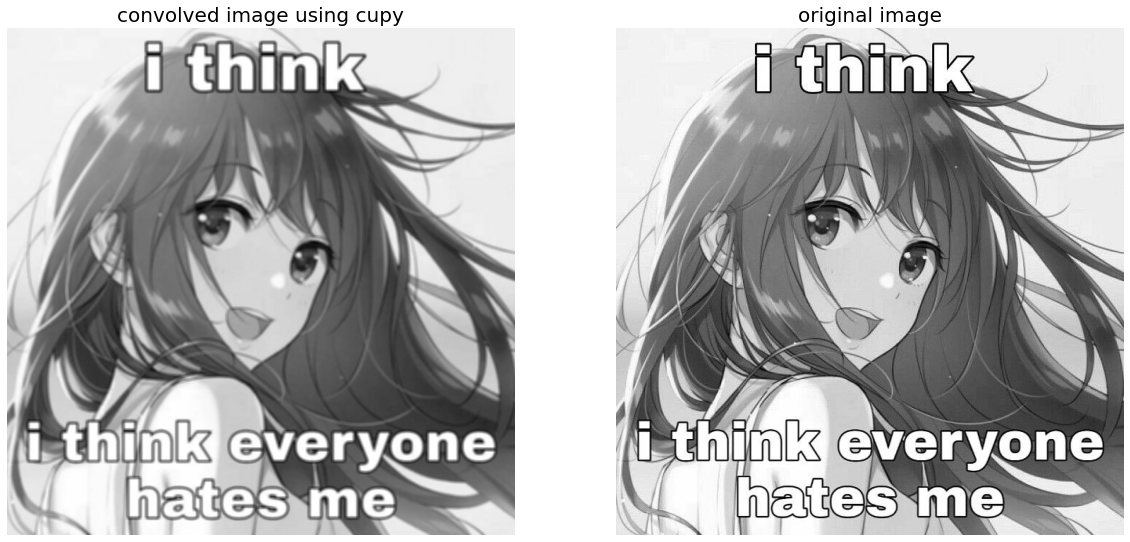

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(cp_image_convolved, cmap='gray')
axes[0].axis('off')
axes[0].set_title('convolved image using cupy', fontsize=20)

axes[1].imshow(np_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('original image', fontsize=20)

plt.show()

In [77]:
np_image_convolved = np.dot(np_image_preprocessed, np_kernel_preprocessed)

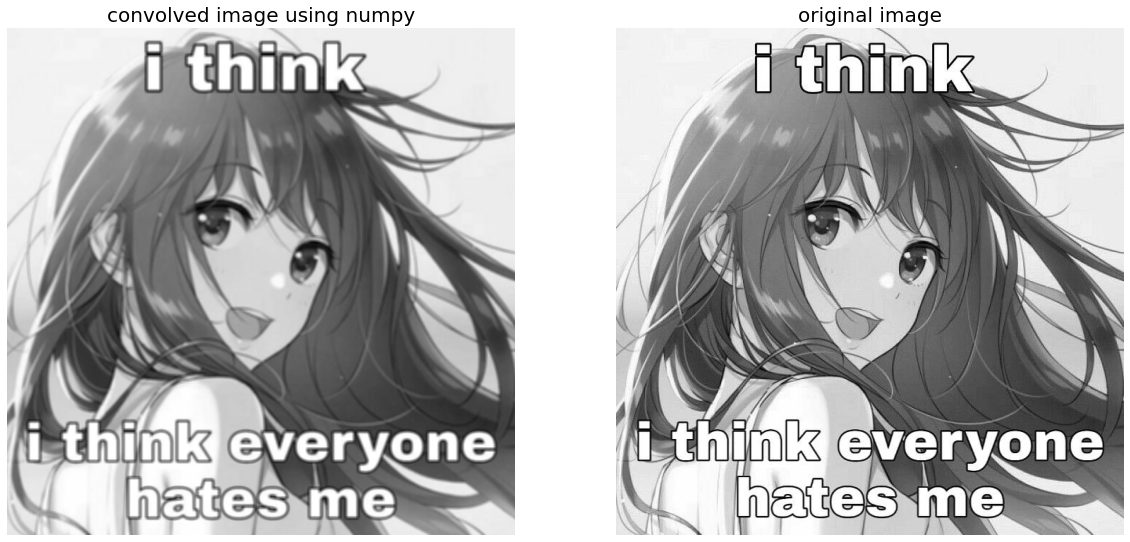

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(np_image_convolved, cmap='gray')
axes[0].axis('off')
axes[0].set_title('convolved image using numpy', fontsize=20)

axes[1].imshow(np_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('original image', fontsize=20)

plt.show()

## Compare Performance of `cupy` vs `numpy`

In [98]:
%%timeit -n 5
_ = cp.dot(cp_image_preprocessed, cp_kernel_preprocessed)

The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 5: 71.9 µs per loop


In [99]:
%%timeit -n 5
_ = np.dot(np_image_preprocessed, np_kernel_preprocessed)

5 loops, best of 5: 27.1 ms per loop


As can be seen, the convolution works the same, but speedup of `cupy` is dramatic